## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [167]:
from sklearn.datasets import load_boston, load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# HW1

## Original method

In [169]:
# 讀取鳶尾花資料集
iris = load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.01796599 0.52229134 0.45974266]


In [177]:
parameters = {'max_depth': range(1,8), 'min_samples_split': range(2,5), 'min_samples_leaf': range(1,5),
              'criterion': ['gini', 'entropy']}
clf_gs = GridSearchCV(clf, param_grid=parameters)
clf_gs.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 8), 'min_samples_split': range(2, 5), 'min_samples_leaf': range(1, 5), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [178]:
clf_gs_best = clf_gs.best_estimator_
print(f'best parameters: {clf_gs.best_params_}')

y_pred = clf_gs_best.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf_gs_best.feature_importances_)

best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.         0.06405315 0.93594685]


# HW2

## Boston Data

In [182]:
boston = load_boston()

In [183]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2, random_state = 168)

### Linear Regression

In [190]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'''
r_square: {r2_score(y_test, lr.predict(X_test))}
MSE: {mean_squared_error(y_test, lr.predict(X_test))}
''')


r_square: 0.7208043881775205
MSE: 17.49300079038335



### Lasso

In [36]:
dict(zip(boston.feature_names, lasso.coef_)).keys()

dict_keys(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [191]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
print(f'''
r_square: {r2_score(y_test, lasso.predict(X_test))}
MSE: {mean_squared_error(y_test, lasso.predict(X_test))}
coefficient: \n{dict(zip(boston.feature_names, np.abs(lasso.coef_)))}
''')


r_square: 0.7186333569327461
MSE: 17.62902675093796
coefficient: 
{'CRIM': 0.08993384381255068, 'ZN': 0.05221434946325558, 'INDUS': 0.0022976807149908815, 'CHAS': 2.538836510813648, 'NOX': 13.5852430379734, 'RM': 3.6339708240731494, 'AGE': 0.0010315854389889862, 'DIS': 1.5253713646976967, 'RAD': 0.3108050937296832, 'TAX': 0.013022149084358031, 'PTRATIO': 0.9170430928865725, 'B': 0.013010875454418548, 'LSTAT': 0.564271783638941}



### Gradient Boosting Regressor

In [192]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
print(f'''
r_square: {r2_score(y_test, gbr.predict(X_test))}
MSE: {mean_squared_error(y_test, gbr.predict(X_test))}
importances: {dict(zip(boston.feature_names, gbr.feature_importances_))}
''')


r_square: 0.907483819052798
MSE: 5.796601228323279



### Decision Tree Regressor

In [193]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print(f'''
r_square: {r2_score(y_test, dtr.predict(X_test))}
MSE: {mean_squared_error(y_test, dtr.predict(X_test))}
importances: {dict(zip(boston.feature_names, dtr.feature_importances_))}
''')


r_square: 0.7934142901676782
MSE: 12.943627450980388
importances: {'CRIM': 0.022724140356913537, 'ZN': 0.002064450355601951, 'INDUS': 0.007030800198741346, 'CHAS': 0.00025310829751490143, 'NOX': 0.0335538545322512, 'RM': 0.2698623348853604, 'AGE': 0.011384107114009603, 'DIS': 0.08642117226094044, 'RAD': 0.0005362107603532214, 'TAX': 0.007448955476249243, 'PTRATIO': 0.026136858934068977, 'B': 0.003915678877707976, 'LSTAT': 0.5286683279502873}



### Decision Tree Regressor

In [146]:
dtr_ = DecisionTreeRegressor()
parameters = {'max_depth': range(1,8), 'min_samples_split': range(2,5), 'min_samples_leaf': range(1,5)}
dtr_gs = GridSearchCV(dtr, param_grid=parameters, n_jobs=-1)
dtr_gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 8), 'min_samples_split': range(2, 5), 'min_samples_leaf': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [194]:
print(f'best parameters: {dtr_gs.best_params_}')
dtr_gs_best = dtr_gs.best_estimator_
print(f'''
r_square: {r2_score(y_test, dtr_gs_best.predict(X_test))}
MSE: {mean_squared_error(y_test, dtr_gs_best.predict(X_test))}
importances: {dict(zip(boston.feature_names, dtr_gs_best.feature_importances_))}
''')

best parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3}

r_square: 0.7992940065651534
MSE: 12.575233825747983
importances: {'CRIM': 0.024534941475653254, 'ZN': 0.0, 'INDUS': 0.003396206704675467, 'CHAS': 0.0, 'NOX': 0.0284162306027531, 'RM': 0.27290172803208035, 'AGE': 0.0043647944172508345, 'DIS': 0.08694638207635735, 'RAD': 0.0, 'TAX': 0.022907404122895107, 'PTRATIO': 0.009115090062249318, 'B': 0.0012415539241515264, 'LSTAT': 0.5461756685819337}



### Visualization

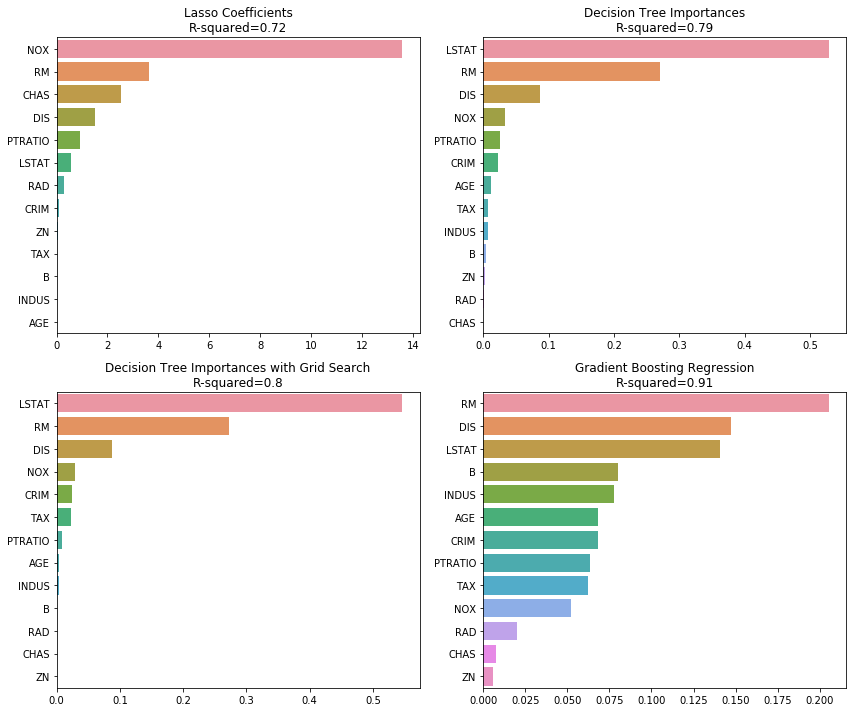

In [211]:
fig, ax = plt.subplots(2,2, figsize = (12,10))
sns.barplot(y = boston.feature_names, x = np.abs(lasso.coef_), orient='h', ax = ax[0,0],\
            order= boston.feature_names[np.abs(lasso.coef_).argsort()[::-1]])
ax[0,0].set_title('Lasso Coefficients\nR-squared={}'\
                .format(round(r2_score(y_test, lasso.predict(X_test)), 2)))

sns.barplot(y = boston.feature_names, x = np.abs(dtr.feature_importances_), orient='h', ax = ax[0,1],\
            order= boston.feature_names[np.abs(dtr.feature_importances_).argsort()[::-1]])
ax[0,1].set_title('Decision Tree Importances\nR-squared={}'\
                .format(round(r2_score(y_test, dtr.predict(X_test)), 2)))

sns.barplot(y = boston.feature_names, x = np.abs(dtr_gs_best.feature_importances_), orient='h', ax = ax[1,0],\
            order= boston.feature_names[np.abs(dtr_gs_best.feature_importances_).argsort()[::-1]])
ax[1,0].set_title('Decision Tree Importances with Grid Search\nR-squared={}'\
                .format(round(r2_score(y_test, dtr_gs_best.predict(X_test)), 2)))

sns.barplot(y = boston.feature_names, x = np.abs(gbr.feature_importances_), orient='h', ax = ax[1,1],\
            order= boston.feature_names[np.abs(gbr.feature_importances_).argsort()[::-1]])
ax[1,1].set_title('Gradient Boosting Regression\nR-squared={}'\
                .format(round(r2_score(y_test, gbr.predict(X_test)), 2)))

plt.tight_layout()